# Gerando vetores affine

## Passo a passo inicial

In [31]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
#img.save('my.png')
#img.show()

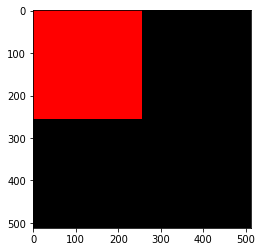

In [32]:
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [33]:
MV0_x = -8.6
MV0_y = -2.6
MV1_x = 15
MV1_y = 7.8

height = 8 # altura do blocão
width = 8 # largura do blocão

MV0 = [0, 0, MV0_x, MV0_y]              # [offset_x, offset_y, x, y]
MV1 = [width, 0, MV1_x, MV1_y]          # [offset_x, offset_y, x, y]

In [34]:
MV0

[0, 0, -8.6, -2.6]

In [35]:
MV1

[8, 0, 15, 7.8]

In [36]:
import numpy as np
import matplotlib

def plot_vectors(
    vetores: list,
    x_limit: int = 32,
    y_limit: int = 32,
    mirror_limits: bool = True):
    
    soa = np.array(vetores)
    X, Y, U, V = zip(*soa)
    plt.figure()
    ax = plt.gca()
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
    if mirror_limits:
        ax.set_xlim([-x_limit, x_limit])
        ax.set_ylim([-y_limit, y_limit])
    else:
        ax.set_xlim([-1, x_limit])
        ax.set_ylim([-1, y_limit])
    plt.draw()
    plt.show()

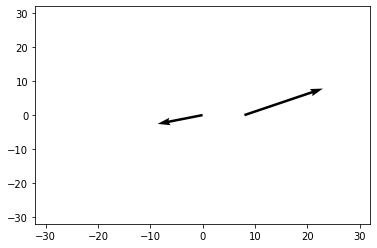

In [37]:
plot_vectors(
    vetores = [MV0, MV1],
    x_limit = 32,
    y_limit = 32,
    mirror_limits = True)

In [38]:
#import handcalcs
# from handcalcs import handcalc

# from math import sqrt, pi

# %%render
# sub_mv_x = x*(MV1_x - MV0_x)/width + y*(MV1_y - MV0_y)/width + MV0_x
# sub_mv_y = x*(MV1_y - MV0_y)/width + y*(MV1_y - MV0_x)/width + MV0_y

In [39]:
x = 0
y = 0
sub_mv_x = x*(MV1_x - MV0_x)/width + y*(MV1_y - MV0_y)/width + MV0_x
sub_mv_y = x*(MV1_y - MV0_y)/width + y*(MV1_y - MV0_x)/width + MV0_y
print(f"sub_mv_x: {sub_mv_x}, sub_mv_y: {sub_mv_y}")

sub_mv = [0, 0, sub_mv_x, sub_mv_y]
sub_mv

sub_mv_x: -8.6, sub_mv_y: -2.6


[0, 0, -8.6, -2.6]

In [50]:
# criando listas vazias: float
sub_mv_x = [[None for _ in range(width)] for _ in range(height)]
sub_mv_y = [[None for _ in range(width)] for _ in range(height)]
sub_mv = [[None for _ in range(width)] for _ in range(height)]

# sub_mv_x = [['a']*width]*height
# sub_mv_y = [['b']*width]*height
# sub_mv = [['f']*width]*height
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(
    vetores: list,
    x_limit: int = 32,
    y_limit: int = 32,
    mirror_limits: bool = True):
    
    soa = np.array(vetores)
    X, Y, U, V = zip(*soa)
    plt.figure()
    ax = plt.gca()
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
    if mirror_limits:
        ax.set_xlim([-x_limit, x_limit])scale_unidfts
        ax.set_ylim([-y_limit, y_limit])
    else:
        ax.set_xlim([-1, x_limit])
        ax.set_ylim([-1, y_limit])
    plt.draw()
    plt.show()
# sub_mv_x

In [51]:
sub_mv_y[0][1]

In [52]:
# CÁLCULO AFFINE dos vetores sub_mvmatplotlib
for y in range(0,height): #itera sobre altura
    for x in range(0,width): #itera sobre largura
        sub_mv_x[x][y] = x*(MV1_x - MV0_x)/width + y*(MV1_y - MV0_y)/width + MV0_x
        sub_mv_y[x][y] = x*(MV1_y - MV0_y)/width + y*(MV1_y - MV0_x)/width + MV0_y
        sub_mv[x][y] = [x, y, sub_mv_x[x][y], sub_mv_y[x][y]]
        # print(x,y)
        print(f"(x,y): {x},{y};  sub_mv[{x}][{y}]:{sub_mv[x][y]}")
    print("---")

    # print("=========")

(x,y): 0,0;  sub_mv[0][0]:[0, 0, -8.6, -2.6]
(x,y): 1,0;  sub_mv[1][0]:[1, 0, -5.6499999999999995, -1.3]
(x,y): 2,0;  sub_mv[2][0]:[2, 0, -2.6999999999999993, 0.0]
(x,y): 3,0;  sub_mv[3][0]:[3, 0, 0.2500000000000018, 1.3000000000000003]
(x,y): 4,0;  sub_mv[4][0]:[4, 0, 3.200000000000001, 2.6]
(x,y): 5,0;  sub_mv[5][0]:[5, 0, 6.15, 3.9]
(x,y): 6,0;  sub_mv[6][0]:[6, 0, 9.100000000000003, 5.200000000000001]
(x,y): 7,0;  sub_mv[7][0]:[7, 0, 12.050000000000002, 6.5]
---
(x,y): 0,1;  sub_mv[0][1]:[0, 1, -7.3, -0.5500000000000003]
(x,y): 1,1;  sub_mv[1][1]:[1, 1, -4.35, 0.7499999999999996]
(x,y): 2,1;  sub_mv[2][1]:[2, 1, -1.3999999999999995, 2.0500000000000003]
(x,y): 3,1;  sub_mv[3][1]:[3, 1, 1.5500000000000025, 3.35]
(x,y): 4,1;  sub_mv[4][1]:[4, 1, 4.500000000000002, 4.65]
(x,y): 5,1;  sub_mv[5][1]:[5, 1, 7.450000000000001, 5.950000000000001]
(x,y): 6,1;  sub_mv[6][1]:[6, 1, 10.400000000000004, 7.250000000000002]
(x,y): 7,1;  sub_mv[7][1]:[7, 1, 13.350000000000003, 8.549999999999999]
---

In [53]:
sub_mv

[[[0, 0, -8.6, -2.6],
  [0, 1, -7.3, -0.5500000000000003],
  [0, 2, -6.0, 1.4999999999999996],
  [0, 3, -4.699999999999999, 3.5499999999999994],
  [0, 4, -3.3999999999999995, 5.6],
  [0, 5, -2.0999999999999996, 7.65],
  [0, 6, -0.7999999999999989, 9.7],
  [0, 7, 0.5, 11.749999999999998]],
 [[1, 0, -5.6499999999999995, -1.3],
  [1, 1, -4.35, 0.7499999999999996],
  [1, 2, -3.049999999999999, 2.7999999999999994],
  [1, 3, -1.7499999999999991, 4.85],
  [1, 4, -0.4499999999999993, 6.9],
  [1, 5, 0.8499999999999996, 8.950000000000001],
  [1, 6, 2.1500000000000004, 11.0],
  [1, 7, 3.450000000000001, 13.049999999999999]],
 [[2, 0, -2.6999999999999993, 0.0],
  [2, 1, -1.3999999999999995, 2.0500000000000003],
  [2, 2, -0.09999999999999964, 4.1],
  [2, 3, 1.200000000000001, 6.15],
  [2, 4, 2.5000000000000018, 8.2],
  [2, 5, 3.8000000000000007, 10.25],
  [2, 6, 5.100000000000001, 12.299999999999999],
  [2, 7, 6.4, 14.35]],
 [[3, 0, 0.2500000000000018, 1.3000000000000003],
  [3, 1, 1.55000000000000

In [54]:
# def list_concatenation_all_sublists(lista: list):
#     import itertools
#     # total = []
#     # for i in lista:
#     #     total += imatplotlib

#     # return list(itertools.chain(*lista))
#     lista_retorno = lista
#     while (any(isinstance(i, list) for i in lista_retorno) == True):
#         lista_retorno = list(itertools.chain.from_iterable(lista_retorno))

#     return lista_retorno

In [55]:
def list_concatenation(lista: list):
    total = []
    for i in lista:
        total += i

    return total

In [56]:
flatten_sub_mv = list_concatenation(sub_mv)
flatten_sub_mv

[[0, 0, -8.6, -2.6],
 [0, 1, -7.3, -0.5500000000000003],
 [0, 2, -6.0, 1.4999999999999996],
 [0, 3, -4.699999999999999, 3.5499999999999994],
 [0, 4, -3.3999999999999995, 5.6],
 [0, 5, -2.0999999999999996, 7.65],
 [0, 6, -0.7999999999999989, 9.7],
 [0, 7, 0.5, 11.749999999999998],
 [1, 0, -5.6499999999999995, -1.3],
 [1, 1, -4.35, 0.7499999999999996],
 [1, 2, -3.049999999999999, 2.7999999999999994],
 [1, 3, -1.7499999999999991, 4.85],
 [1, 4, -0.4499999999999993, 6.9],
 [1, 5, 0.8499999999999996, 8.950000000000001],
 [1, 6, 2.1500000000000004, 11.0],
 [1, 7, 3.450000000000001, 13.049999999999999],
 [2, 0, -2.6999999999999993, 0.0],
 [2, 1, -1.3999999999999995, 2.0500000000000003],
 [2, 2, -0.09999999999999964, 4.1],
 [2, 3, 1.200000000000001, 6.15],
 [2, 4, 2.5000000000000018, 8.2],
 [2, 5, 3.8000000000000007, 10.25],
 [2, 6, 5.100000000000001, 12.299999999999999],
 [2, 7, 6.4, 14.35],
 [3, 0, 0.2500000000000018, 1.3000000000000003],
 [3, 1, 1.5500000000000025, 3.35],
 [3, 2, 2.85000000

In [57]:
flatten_sub_mv = list_concatenation(sub_mv)
all_vectors = flatten_sub_mv
all_vectors.append(MV0)
all_vectors.append(MV1)
all_vectors

[[0, 0, -8.6, -2.6],
 [0, 1, -7.3, -0.5500000000000003],
 [0, 2, -6.0, 1.4999999999999996],
 [0, 3, -4.699999999999999, 3.5499999999999994],
 [0, 4, -3.3999999999999995, 5.6],
 [0, 5, -2.0999999999999996, 7.65],
 [0, 6, -0.7999999999999989, 9.7],
 [0, 7, 0.5, 11.749999999999998],
 [1, 0, -5.6499999999999995, -1.3],
 [1, 1, -4.35, 0.7499999999999996],
 [1, 2, -3.049999999999999, 2.7999999999999994],
 [1, 3, -1.7499999999999991, 4.85],
 [1, 4, -0.4499999999999993, 6.9],
 [1, 5, 0.8499999999999996, 8.950000000000001],
 [1, 6, 2.1500000000000004, 11.0],
 [1, 7, 3.450000000000001, 13.049999999999999],
 [2, 0, -2.6999999999999993, 0.0],
 [2, 1, -1.3999999999999995, 2.0500000000000003],
 [2, 2, -0.09999999999999964, 4.1],
 [2, 3, 1.200000000000001, 6.15],
 [2, 4, 2.5000000000000018, 8.2],
 [2, 5, 3.8000000000000007, 10.25],
 [2, 6, 5.100000000000001, 12.299999999999999],
 [2, 7, 6.4, 14.35],
 [3, 0, 0.2500000000000018, 1.3000000000000003],
 [3, 1, 1.5500000000000025, 3.35],
 [3, 2, 2.85000000

In [58]:
# list_concatenation_all_sublists(sub_mv)

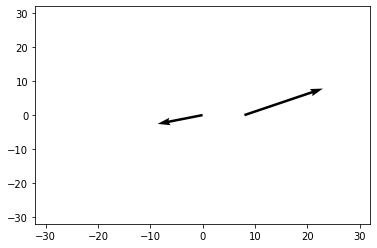

In [59]:
plot_vectors(
    vetores = [MV0, MV1],
    x_limit = 32,
    y_limit = 32,
    mirror_limits = True)

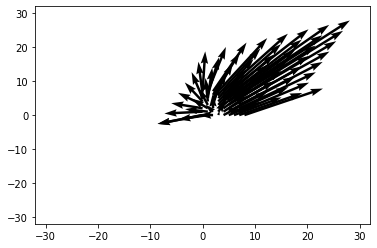

In [60]:
flatten_sub_mv

plot_vectors(
    vetores = flatten_sub_mv,
    x_limit = 32,
    y_limit = 32,
    mirror_limits = True)

## Função vetores affine

In [61]:
def list_concatenation(lista: list):
    total = []
    for i in lista:
        total += i

    return total

In [62]:
def affine_vectors(
    MV0_x: float = -8.6,
    MV0_y: float = -2.6,
    MV1_x: float = 15,
    MV1_y: float = 7.8,
    height: float = 8, # altura do blocão
    width: float = 8 # largura do blocão
):

    MV0 = [0, 0, MV0_x, MV0_y]              # [offset_x, offset_y, x, y]
    MV1 = [width, 0, MV1_x, MV1_y]          # [offset_x, offset_y, x, y]):
    # CÁLCULO AFFINE dos vetores sub_mvmatplotlib
    for y in range(0,height): #itera sobre altura
        for x in range(0,width): #itera sobre largura
            sub_mv_x[x][y] = x*(MV1_x - MV0_x)/width + y*(MV1_y - MV0_y)/width + MV0_x
            sub_mv_y[x][y] = x*(MV1_y - MV0_y)/width + y*(MV1_y - MV0_x)/width + MV0_y
            sub_mv[x][y] = [x, y, sub_mv_x[x][y], sub_mv_y[x][y]]

            # print(f"(x,y): {x},{y};  sub_mv[{x}][{y}]:{sub_mv[x][y]}")
        # print("---")
        # print("=========")
    flatten_sub_mv = list_concatenation(sub_mv)
    flatten_sub_mv = list_concatenation(sub_mv)
    all_vectors = flatten_sub_mv
    # all_vectors.append(MV0)
    # all_vectors.append(MV1)

    return all_vectors, MV0, MV1


## Função Plot vectors

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(
    vetores: list,
    x_limit: int = 32,
    y_limit: int = 32,
    mirror_limits: bool = True):
    
    soa = np.array(vetores)
    X, Y, U, V = zip(*soa)
    plt.figure()
    ax = plt.gca()
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
    if mirror_limits:
        ax.set_xlim([-x_limit, x_limit])
        ax.set_ylim([-y_limit, y_limit])
    else:
        ax.set_xlim([-1, x_limit])
        ax.set_ylim([-1, y_limit])
    plt.draw()
    plt.show()

# Float to bin

## funções

In [75]:
# def neg_float_exponent_to_bin(x, n_integer):
#     out = '{:0{}b}'.format(int(x), n_integer) # float -> bin
#     if (str(out).find('-')== 0): #esta função é True quando == 0
#         x_replace = str(out).replace('-','0') #substitui o sinal negativo que fica no valor por '0'
#         x_inv = transform(x_replace) #replace ones by zeros and vice versa (complemento de 1)
#         x_inv_float = int(x_inv,2)  # transforma em inteiro
#         comp_2_float = x_inv_float + 1 # soma +1  = complemento de 2
#         x_comp = float_to_binary(comp_2_float, n_integer, 0,False) #transforma para binário
#         return x_comp


In [76]:
#Function used to replace zeros by ones and vice versa
def transform(x):
    text = ''
    for i in x:
        if i == '1':
            text += "0"  # directly add the `.`
        else:
            text += "1"  # directly add the `_`
    return text

transform('01111100') # call the function

'10000011'

In [77]:
def float_to_binary(x, m, n, signed):
    """Convert the float value `x` to a binary string of length `m + n`
    where the first `m` binary digits are the integer part and the last
    'n' binary digits are the fractional part of `x`.
    """
    x_replace = ''
    x_inv = ''
    x_inv_float = ''
    x_comp = ''
    decimais = 0

    if (signed == 1):
      decimais = n-1
    else: decimais = n

    x_scaled = round(x * 2 ** (decimais))
    out = '{:0{}b}'.format(x_scaled, m + (decimais)) # float -> bin
    # return out

    #---------------------NUMEROS NEGATIVOS---------------------#
    #Two complement logic
    if (str(out).find('-')== 0): #esta função é True quando == 0
      x_replace = str(out).replace('-','') #tira o sinal negativo que fica no valor
      
      while (len(x_replace)< n ):
        x_replace = '0' + x_replace # adiciona um zeros que a função bosta tira de bug
        #pois a função está deixando com apenas 7 bits quando o valor é negativo ou até menos

      x_inv = transform(x_replace) #replace ones by zeros and vice versa
      x_inv_float = binary_to_float(x_inv, m, (decimais),0) #transforma em real

      #adiciona o 1 binário do complemento de 2, depende do número de bits para fazer esta adição em float
      # onde: (1 de 3 casas decimais) = 0.125 = 2^-3
      #adição feita em real, pois não há operações binárias de soma no python até então, logo:
      #transforma em binário o número inverso já somado com 1
      x_comp = float_to_binary(x_inv_float + (2**-(decimais)), m, n,1)
      # x_comp = x_comp[1:]

      return x_comp
      # return x_scaled,out,x_replace,x_inv,x_inv_float,x_comp,x_comp


      # if (x_scaled < (2**decimais)):
      #   return x_comp
      # else:
      #   return '{:0{}b}'.format(( 2**decimais -1), m + (decimais)) # float -> bin

    #---------------------NUMEROS POSITIVOS---------------------#
    else:
      # out = '0' + out # adiciona um zeros que a função bosta tira de bug
      while (len(out)< n ):
          out = '0' + out # adiciona um zeros que a função bosta tira de bug
      return  out

      # if (x_scaled < (2**decimais)): # se x_scaled < limite: retorna valor normal
      #   while (len(out)< n ):
      #     out = '0' + out # adiciona um zeros que a função bosta tira de bug
      #   return  outxfsdfind
      # else: 
      #   return '{:0{}b}'.format(( 2**decimais -1), m + (decimais)) # float -> bin
    
  # else: #unsigned
  #   x_scaled = round(x * 2 ** n)
  # 507812  return '{:0{}b}'.format(x_scaled, m + n)


def binary_to_float(bstr, m, n, signed): # (binario, exponent, mantissa, signed)
    """Convert a binary string in the format given above to its float
    value.
    """
    if (signed == 1): #signed
      if (bstr[:1]== '1'):def float_to_binary(x, m, n, signed):
    """Convert the float value `x` to a binary string of length `m + n`
    where the first `m` binary digits are the integer part and the last
    'n' binary digits are the fractional part of `x`.
    """
    x_replace = ''
    x_inv = ''
    x_inv_float = ''
    x_comp = ''
    decimais = 0

    if (signed == 1):
      decimais = n-1
    else: decimais = n

    x_scaled = round(x * 2 ** (decimais))
    out = '{:0{}b}'.format(x_scaled, m + (decimais)) # float -> bin
    # return out

    #---------------------NUMEROS NEGATIVOS---------------------#
    #Two complement logic
    if (str(out).find('-')== 0): #esta função é True quando == 0
      x_replace = str(out).replace('-','') #tira o sinal negativo que fica no valor
      
      while (len(x_replace)< n ):
        x_replace = '0' + x_replace # adiciona um zeros que a função bosta tira de bug
        #pois a função está deixando com apenas 7 bits quando o valor é negativo ou até menos

      x_inv = transform(x_replace) #replace ones by zeros and vice versa
      x_inv_float = binary_to_float(x_inv, m, (decimais),0) #transforma em real

      #adiciona o 1 binário do complemento de 2, depende do número de bits para fazer esta adição em float
      # onde: (1 de 3 casas decimais) = 0.125 = 2^-3
      #adição feita em real, pois não há operações binárias de soma no python até então, logo:
      #transforma em binário o número inverso já somado com 1
      x_comp = float_to_binary(x_inv_float + (2**-(decimais)), m, n,1)
      # x_comp = x_comp[1:]

      return x_comp
      # return x_scaled,out,x_replace,x_inv,x_inv_float,x_comp,x_comp


      # if (x_scaled < (2**decimais)):
      #   return x_comp
      # else:
      #   return '{:0{}b}'.format(( 2**decimais -1), m + (decimais)) # float -> bin

    #---------------------NUMEROS POSITIVOS---------------------#
    else:
      # out = '0' + out # adiciona um zeros que a função bosta tira de bug
      while (len(out)< n ):
          out = '0' + out # adiciona um zeros que a função bosta tira de bug
      return  out

      # if (x_scaled < (2**decimais)): # se x_scaled < limite: retorna valor normal
      #   while (len(out)< n ):
      #     out = '0' + out # adiciona um zeros que a função bosta tira de bug
      #   return  outxfsdfind
      # else: 
      #   return '{:0{}b}'.format(( 2**decimais -1), m + (decimais)) # float -> bin
    
  # else: #unsigned
  #   x_scaled = round(x * 2 ** n)
  # 507812  return '{:0{}b}'.format(x_scaled, m + n)


def binary_to_float(bstr, m, n, signed): # (binario, exponent, mantissa, signed)
    """Convert a binary string in the format given above to its float
    value.
    """
    if (signed == 1): #signed
      if (bstr[:1]== '1'):
        x_replace = bstr[1:]
        # x_replaxfsdce = bstr
        return (int((x_replace), 2) / 2 ** (n-1)) -1
      else: return int((bstr), 2) / 2 ** (n-1)
    else: #unsigned
      return int((bstr), 2) / 2 ** n

# print(float_to_binary(10.625, 6, 5))
# print(binary_to_float('00101010100', 6, 5))
        x_replace = bstr[1:]
        # x_replaxfsdce = bstr
        return (int((x_replace), 2) / 2 ** (n-1)) -1
      else: return int((bstr), 2) / 2 ** (n-1)
    else: #unsigned
      return int((bstr), 2) / 2 ** n

# print(float_to_binary(10.625, 6, 5))
# print(binary_to_float('00101010100', 6, 5))

In [78]:
def pos_float_to_bin(x, n_integer, decimais):
    x_scaled = round(x * 2 ** (decimais))
    out = '{:0{}b}'.format(x_scaled, n_integer+decimais) # float -> bin
    # x_replace = str(out).replace('-','1') #tira o sinal negativo que fica no valor
    return out

def float_to_bin(x, n_integer, decimais):
    if (x >= 0): # se x é positivo
        return pos_float_to_bin(x=x, n_integer=n_integer, decimais=decimais)
    else: # se x é negativo
        positive_res = pos_float_to_bin(x=x, n_integer=n_integer, decimais=decimais)
        x_inv = transform(positive_res) #replace ones by zeros and vice versa (complemento de 1)
        x_inv_float = int(x_inv,2)
        comp_2_float = x_inv_float + 1
        x_comp = float_to_binary(comp_2_float, n_integer, 0,False)
        return x_comp

## testando funções

In [79]:
is_signed = True        # com sinal
n_integer = 4           # número de casas de inteiro = expoente = parte inteira
n_mantissa = 4          # número de casas decimais = parte fracionária

In [80]:
x= [-2, -1,-0.992188,-0.507812, -0.500000,-0.492188,-0.015625,0,0.496094,0.507812,0.992188]
for i in range(0,len(x)):
  print('float: ', x[i],'bin: ',float_to_binary(x[i] ,n_integer,n_mantissa,is_signed))

float:  -2 bin:  0110000
float:  -1 bin:  0111000
float:  -0.992188 bin:  0111000
float:  -0.507812 bin:  0111100
float:  -0.5 bin:  0111100
float:  -0.492188 bin:  0111100
float:  -0.015625 bin:  0000000
float:  0 bin:  0000000
float:  0.496094 bin:  0000100
float:  0.507812 bin:  0000100
float:  0.992188 bin:  0001000


In [81]:
# m = n_integer
# decimais = n_mantissa

In [82]:
x= [-8, -7.9375, -7, -5.0625, -5, -2, -1,-0.992188,-0.507812, -0.500000,-0.492188,-0.015625,0,0.0625,0.125, 0.25, 0.5, 0.75, 0.875,0.9375]
for i in range(0,len(x)):
  # print('float: ', x[i],'bin: ',float_to_binary(x[i] ,0,8,is_signed))
  print('float: ', x[i],'     bin: ',float_to_bin(x=x[i], n_integer=n_integer, decimais=n_mantissa))

float:  -8      bin:  110000000
float:  -7.9375      bin:  10000001
float:  -7      bin:  10010000
float:  -5.0625      bin:  10101111
float:  -5      bin:  10110000
float:  -2      bin:  11100000
float:  -1      bin:  11110000
float:  -0.992188      bin:  11110000
float:  -0.507812      bin:  11111000
float:  -0.5      bin:  11111000
float:  -0.492188      bin:  11111000
float:  -0.015625      bin:  100000000
float:  0      bin:  00000000
float:  0.0625      bin:  00000001
float:  0.125      bin:  00000010
float:  0.25      bin:  00000100
float:  0.5      bin:  00001000
float:  0.75      bin:  00001100
float:  0.875      bin:  00001110
float:  0.9375      bin:  00001111


# Gerando outputs esperados testbench

In [83]:
all_affine_vectors, MV0, MV1 = affine_vectors(
    MV0_x = -8.6,
    MV0_y = -2.6,
    MV1_x = 15,
    MV1_y = 7.8,
    height = 8, # altura do blocão
    width = 8 # largura do blocão
)

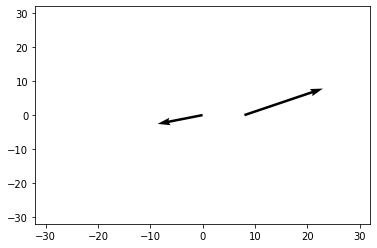

In [84]:
plot_vectors(
    vetores = [MV0, MV1],
    x_limit = 32,
    y_limit = 32,
    mirror_limits = True)

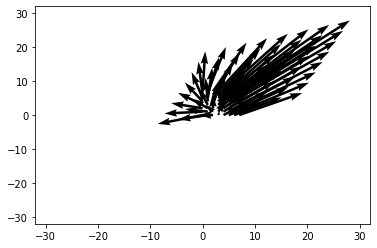

In [85]:
plot_vectors(
    vetores = all_affine_vectors,
    x_limit = 32,
    y_limit = 32,
    mirror_limits = True)

In [107]:
is_signed = True        # com sinal
n_integer = 4           # número de casas de inteiro = expoente = parte inteira
n_mantissa = 4          # número de casas decimais = parte fracionária
bits_width = n_integer + n_mantissa

In [95]:
# Devemos ter um limite para a representação dos números, de acordo com a largura de bits de representação.
# Para 8 bits, sendo 4 para os inteiros. Teremos um range:
# - Limite superior (upper_limit):    0111 1111 =  4 + 2 + 1     + 1/2   + 1/4   + 1/8   + 1/16  = 7.9375
# - Limite inferior (low_limit):      1000 0000 = -8 + 0 + 0     + 0     + 0     + 0     + 0     = -8

In [96]:
upper_limit = (2**(n_integer-1)) - (2**-n_mantissa)
upper_limit

7.9375

In [97]:
low_limit = -(2**(n_integer-1))
low_limit

-8

In [108]:
import pandas as pd
df_MV  = pd.DataFrame([MV0, MV1])
df_MV.columns =['offset_x', 'offset_y', 'X', 'Y']

df_MV

,offset_x,offset_y,X,Y
0,0,0,-8.6,-2.6
1,8,0,15.0,7.8


In [109]:
# AJUSTANTO DATAFRAME CONFORME LIMITES DE REPRESENTAÇÃO
df_MV.loc[df_MV.X > upper_limit, 'X'] = upper_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
df_MV.loc[df_MV.X < low_limit, 'X'] = low_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior

df_MV.loc[df_MV.Y > upper_limit, 'Y'] = upper_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
df_MV.loc[df_MV.Y < low_limit, 'Y'] = low_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
df_MV

,offset_x,offset_y,X,Y
0,0,0,-8.0000,-2.6
1,8,0,7.9375,7.8


In [111]:
from fxpmath import Fxp
df_MV['X_bin'] = (df_MV['X'].apply(lambda x:  Fxp(x, signed=True, n_word= bits_width, n_frac= n_mantissa).bin() ) )
df_MV['Y_bin'] = (df_MV['Y'].apply(lambda x:  Fxp(x, signed=True, n_word= bits_width, n_frac= n_mantissa).bin() ) )

# df_MV['Y_bin'] = (df_MV['Y'].apply(lambda x: float_to_bin(x=x, n_integer=n_integer, decimais=n_mantissa)))

df_MV

,offset_x,offset_y,X,Y,X_bin,Y_bin
0,0,0,-8.0000,-2.6,10000000,11010111
1,8,0,7.9375,7.8,01111111,01111100


In [139]:
import os
actual_path = os.path.abspath(os.getcwd())
actual_path

'/home/lspadersimon/Documents/PCS'

In [142]:
# salvando vetores MV (ENTRADA)

txt_name = 'MV.txt'
np.savetxt(f'{actual_path}/Text_Files/{txt_name}', df_MV.iloc[:,-2:].values, fmt="%s")

In [143]:
# salvando vetores sub_mv (saídas esperadas)

df_sub_mv = df.iloc[:, -2:] # Remember that Python does not slice inclusive of the ending index.
txt_name = 'sub_mv.txt'
np.savetxt(f'{actual_path}/Text_Files/{txt_name}', df_sub_mv.values, fmt="%s")


In [113]:
df = pd.DataFrame(all_affine_vectors)
df.columns =['offset_x', 'offset_y', 'X', 'Y']

# AJUSTANTO DATAFRAME CONFORME LIMITES DE REPRESENTAÇÃO
df.loc[df.X > upper_limit, 'X'] = upper_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
df.loc[df.X < low_limit, 'X'] = low_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior

df.loc[df.Y > upper_limit, 'Y'] = upper_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
df.loc[df.Y < low_limit, 'Y'] = low_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior

# GERANDO COLUNAS EM BINÁRIO
df['X_bin'] = (df['X'].apply(lambda x:  Fxp(x, signed=True, n_word= bits_width, n_frac= n_mantissa).bin() ) )
df['Y_bin'] = (df['Y'].apply(lambda x:  Fxp(x, signed=True, n_word= bits_width, n_frac= n_mantissa).bin() ) )
df


,offset_x,offset_y,X,Y,X_bin,Y_bin
0,0,0,-8.0000,-2.6000,10000000,11010111
1,0,1,-7.3000,-0.5500,10001100,11111000
2,0,2,-6.0000,1.5000,10100000,00010111
3,0,3,-4.7000,3.5500,10110101,00111000
4,0,4,-3.4000,5.6000,11001010,01011001
...,...,...,...,...,...,...
59,7,3,7.9375,7.9375,01111111,01111111
60,7,4,7.9375,7.9375,01111111,01111111
61,7,5,7.9375,7.9375,01111111,01111111
62,7,6,7.9375,7.9375,01111111,01111111
